In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## 5th order fit without regularization

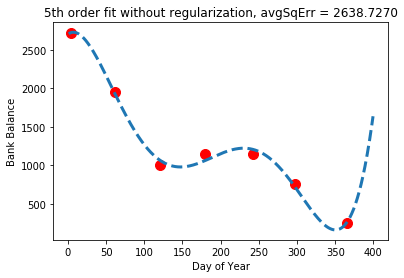

In [11]:
# day of year
x = np.mat('4; 62; 120; 180; 242; 297; 365')
# bank balance
y = np.mat('2720; 1950; 1000; 1150; 1140; 750; 250')

# bias term
bias = np.ones((x.shape[0],1))

# 5th order polynomial
m = np.hstack((bias, x, np.power(x,2), np.power(x,3), np.power(x,4), np.power(x,5)))

# normal equation
w = np.dot(np.dot(np.linalg.inv(np.dot(m.T, m)), m.T), y)
h = np.dot(m, w)
avg_sq_err = np.sum(np.power(h - y, 2)) / y.shape[0]

# plot the graph
plt.plot(x, y, 'ro', markersize=10, linewidth=3)
plt.ylabel('Bank Balance')
plt.xlabel('Day of Year')

t = np.arange(1, 400, 0.5)
plot_x = np.vstack((np.ones(t.shape[0]), t, np.power(t,2), np.power(t,3), np.power(t,4), np.power(t,5))).T
plot_y = np.dot(plot_x, w)

plt.plot(t, plot_y, '--', markersize=10, linewidth=3)
plt.title('5th order fit without regularization, avgSqErr = %.4f' % avg_sq_err)
plt.show()

## 5th order fit with regularization

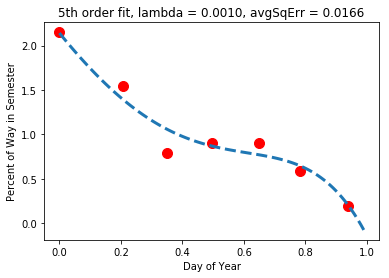

In [13]:
# percent of way in semester
x = np.mat('0; 0.2072; 0.3494; 0.4965; 0.6485; 0.7833; 0.9400')
# bank balance ($K)
y = np.mat('2.150; 1.541; 0.790; 0.909; 0.901; 0.593; 0.198')

# bias term
bias = np.ones((x.shape[0],1))

# 5th order polynomial
m = np.hstack((bias, x, np.power(x,2), np.power(x,3), np.power(x,4), np.power(x,5)))

# regularization
lam = 0.001
# identity term
eye = np.identity(m.shape[1])
# do not penalize the constant coefficient
eye[0,0] = 0

# normal equation with regularization
w = np.dot(np.dot(np.linalg.inv(np.dot(m.T, m) + lam * eye), m.T), y)

h = np.dot(m, w)
avg_sq_err = np.sum(np.power(h - y, 2)) / y.shape[0]

# plot the graph
plt.plot(x, y, 'ro', markersize=10, linewidth=3)
plt.ylabel('Percent of Way in Semester')
plt.xlabel('Day of Year')

t = np.arange(0, 1, 0.01)
plot_x = np.vstack((np.ones(t.shape[0]), t, np.power(t,2), np.power(t,3), np.power(t,4), np.power(t,5))).T
plot_y = np.dot(plot_x, w)

plt.plot(t, plot_y, '--', markersize=10, linewidth=3)
plt.title('5th order fit, lambda = %.4f, avgSqErr = %.4f' % (lam,avg_sq_err))
plt.show()

## Effect of regularization

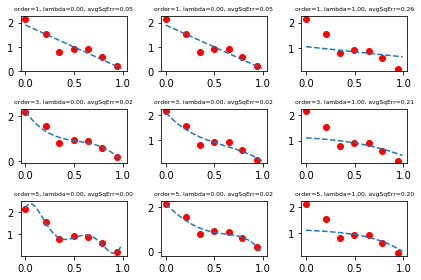

In [51]:
# percent of way in semester
x = np.mat('0; 0.2072; 0.3494; 0.4965; 0.6485; 0.7833; 0.9400')
# bank balance ($K)
y = np.mat('2.150; 1.541; 0.790; 0.909; 0.901; 0.593; 0.198')

# regularization term lambda
lams = np.array([0, 0.001, 1])

# order of polynomial
D = np.array([1, 3, 5])

# bias term
bias = np.ones((x.shape[0],1))

p1 = np.hstack((bias, x))
p2 = np.hstack((bias, x, np.power(x,2), np.power(x,3)))
p3 = np.hstack((bias, x, np.power(x,2), np.power(x,3), np.power(x,4), np.power(x,5)))
polys = [p1, p2, p3]

t = np.arange(0, 1, 0.01)
pt1 = np.vstack((np.ones(t.shape[0]), t)).T
pt2 = np.vstack((np.ones(t.shape[0]), t, np.power(t,2), np.power(t,3))).T
pt3 = np.vstack((np.ones(t.shape[0]), t, np.power(t,2), np.power(t,3), np.power(t,4), np.power(t,5))).T
pts = [pt1, pt2, pt3]

for i in range(0,3):
    for j in range(0,3):
        eye = np.identity(polys[i].shape[1])
        w = np.dot(np.dot(np.linalg.inv(np.dot(polys[i].T, polys[i]) + lams[j] * eye), polys[i].T), y)
        h = np.dot(polys[i], w)
        avg_sq_err = np.sum(np.power(h - y, 2)) / y.shape[0]
        plt.subplot(3,3,i*3+j+1)
        plt.title('order=%d, lambda=%.2f, avgSqErr=%.2f' % (D[i],lams[j],avg_sq_err), fontsize=6)
        plt.plot(x, y, 'ro')
        plot_y = np.dot(pts[i], w)
        plt.plot(t, plot_y, '--')
    # end
# end

plt.tight_layout()
plt.savefig('hw3_q7.p')
plt.show()